### This Notebook is only used to show how good the model we have created is, where we will display accuracy, loss, precision, Macro F1-Score, Micro F1-Score, Weighted F1-Score, and Confusion Matrix using test data that has never been tried in the model.

## Library

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
from absl import logging
logging.set_verbosity(logging.ERROR)

In [2]:
print('\u2022 Using TensorFlow Version:', tf.__version__)
print('\u2022 GPU Device Found.' if tf.config.list_physical_devices('GPU') else '\u2022 GPU Device Not Found. Running on CPU')

• Using TensorFlow Version: 2.7.0
• GPU Device Found.


## Load Model

In [3]:
model = tf.keras.models.load_model('Xception_datafix.h5')

### Data Preprocessing 

In [4]:
TEST_DIR = "Dataset_fix/test_dir/"
test_datagen = ImageDataGenerator(rescale=1./255.)
test_generator = test_datagen.flow_from_directory(directory=TEST_DIR,
                                                 batch_size=32,
                                                 class_mode="categorical",
                                                 target_size=(299, 299), #Xception model Image Size must be (299,299)
                                                 shuffle=False)  

true_labels = test_generator.classes
class_labels = test_generator.class_indices.keys()

Found 1000 images belonging to 20 classes.


### Accuracy and Loss

In [5]:
results = model.evaluate(test_generator)

for metric, value in zip(model.metrics_names, results):
    print(metric + ': {:.3}'.format(value))

32/32 [==============================] - 10s 204ms/step - loss: 0.5025 - accuracy: 0.8420
loss: 0.503
accuracy: 0.842


### Classification Report

In [6]:
# Predict labels for all test images
predictions = model.predict_generator(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

C:\Users\Tirta\AppData\Local\Temp\ipykernel_27784\4155059103.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


In [7]:
print('\tClassification Report Model Using Test Directory:\n\n',
      classification_report(true_labels, predicted_labels, target_names=class_labels))

	Classification Report Model Using Test Directory:

                         precision    recall  f1-score   support

    American_shorthair       0.52      0.68      0.59        50
          Basset_hound       0.98      0.84      0.90        50
                Beagle       0.98      0.98      0.98        50
                Bengal       0.90      0.86      0.88        50
                 Boxer       1.00      0.94      0.97        50
     British_Shorthair       0.68      0.46      0.55        50
             Chihuahua       0.92      0.90      0.91        50
English_cocker_spaniel       0.89      0.96      0.92        50
         Japanese_chin       0.94      0.98      0.96        50
            Maine_Coon       0.68      0.84      0.75        50
          Newfoundland       0.96      0.96      0.96        50
               Persian       0.86      0.88      0.87        50
            Pomeranian       0.94      0.88      0.91        50
                   Pug       0.85      1.00      0

In [8]:
print('Test accuracy = ', round(accuracy_score(true_labels, predicted_labels), 2))
score_macro = f1_score(true_labels, predicted_labels, average="macro")
print("Macro F1-Score: ", score_macro)
score_micro = f1_score(true_labels, predicted_labels, average="micro")
print("Micro F1-Score: ", score_micro)
score_weighted = f1_score(true_labels, predicted_labels, average="weighted")
print("Weighted F1-Score: ", score_weighted)

Test accuracy =  0.84
Macro F1-Score:  0.8407495451053425
Micro F1-Score:  0.842
Weighted F1-Score:  0.8407495451053424


### Confusion Matrix

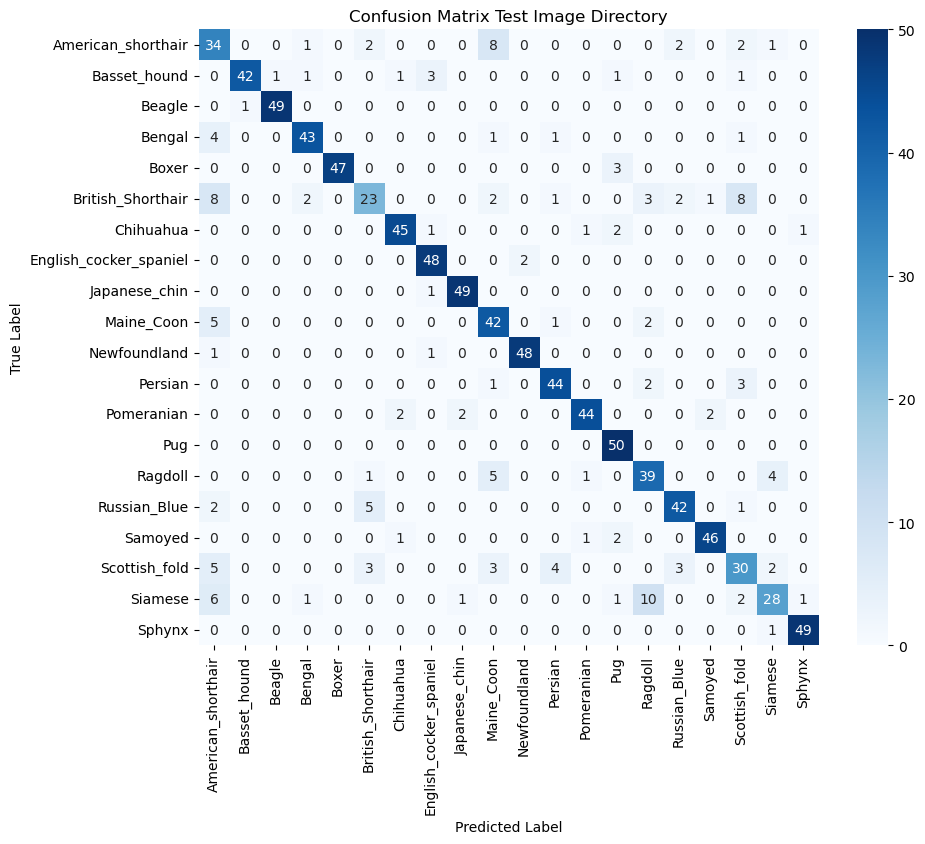

In [9]:
# Calculating confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Display confusion matrix in graph form
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Test Image Directory')
plt.show()